In [2]:
#Imports that are useful everywhere
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem 1 Logistic Regression

This dataset is a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user using logistic regression!

Perform a train test split of 80/20 

Documentation for the logistic regression classifier can be found here:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression

You will find it performs similar to other sklearn models, it has a fit and predict method as expected.

There is a hyperparameter we did not discuss in class called C in the sklearn model and $\lambda$ in other literature.  How this operates is not of concern to our class, but it is a hyperparameter and thus a "knob" we can turn in our model.  

**For those interested: https://compgenomr.github.io/book/logistic-regression-and-regularization.html**

Change the value of C in a loop and test on all values $10^{-10},10^{-9}...10^{9},10^{10}$ and find the highest performing C value by calculating the accuracy of your model using five fold cross validation.  You may use cross_val_score to avoid having to setup the folds yourself (I recommend doing so).

Once you have found the highest performing C value plot a confusion matrix by predicting on the test data and comparing the predictions against y_test using seaborn (the nice heatmap kind). 

**You may (most likely) will get a warning about "ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."**

You can bypass this by setting max_iter=1000 in the logistic regression model (my extensive testing hasn't yielded this error at all at 1000, and it's mostly cleared at 100 so just set it to 1000).

**Logistic regression is pretty sensitive to the input data and we will only use numeric data.  Do not work with the columns that contain string data (or the timestamp column)**

In [3]:
## Problem 1 imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [4]:
ad_df = pd.read_csv("advertising.csv")
#x data without string columns
ad_df_cleaned = (((ad_df.drop("Ad Topic Line", axis=1)).drop("Timestamp",axis=1)).drop("City",axis=1)).drop("Country",axis=1).drop("Clicked on Ad", axis=1)
y_data = ad_df["Clicked on Ad"]

x_train, x_test, y_train, y_test = train_test_split(ad_df_cleaned,y_data,test_size=0.20)

C value of 0.1


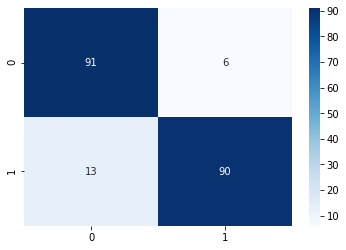

In [5]:
c_params = list(range(-10,11))
c_params = [10**x for x in c_params]
scores = []

for c in c_params:
    lg = LogisticRegression(max_iter=1000, C = c).fit(x_train,y_train)
    scores.append(cross_val_score(lg, ad_df_cleaned, y_data, cv = 5).mean())

best_c_index = scores.index(max(scores))
lg = LogisticRegression(max_iter=1000, C=c_params[best_c_index]).fit(x_train,y_train)
pred = lg.predict(x_test)

sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='Blues', fmt='g')
print("C value of " + str(c_params[best_c_index]))
#best C value

## Problem 2 PCA and logistic regression!

In this problem you will be working with MNIST digits, similar to the MNIST fashion except they are simply handwritten digits 0 through 9, but once again stored as 28x28 images.  I've taken the liberty of loading the dataset into memory and performing an 80/20 train/test split since the dataset is fairly large to help save you time.

### Step 1:  Create a logistic regression model and fit it using the train_images and train_labels, set the number of max iterations to 1000 as you did in problem 1.  Make sure to time how long fitting and predicting the logistic regression model takes.  You can either print that time elapsed or save it.

### Step 2: Make a confusion matrix with seaborn, what was your accuracy?

### Step 3: Make a PCA model and input 50 as the number of dimensions to keep.  Fit it only on the training data.  Repeat steps 1 and 2 with this pca data.

### Step 4: Make a StandardScaler and fit it on the training data, then transform on training and testing data saving these as a different name.  Next Build another PCA model and fit it on the StandardScaler's training data.  Take this PCA model and transform  the standardscaler transformed data (if this gets confusing ask on piazza) and repeat steps 1/2 again.

### Step 5: Write a small summary of what just happened in this problem.  How accurate were you able to predict keeping only 50 dimensions of your 784 dimensional data?  Is it better or worse than you expected?  Discuss in a markdown cell after your code.

**PCA documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html** 

**StandardScaler documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html**



In [6]:
## Problem 2 imports
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
train_images, test_images, train_labels, test_labels = train_test_split(mnist.data, mnist.target, test_size=.2,random_state=0)

In [7]:
#step 1
start_time = time.time()

lg = LogisticRegression(max_iter=1000).fit(train_images, train_labels)
pred = lg.predict(test_images)

print("--- %s seconds ---" % (time.time() - start_time))

--- 103.14043164253235 seconds ---


C:\Users\younk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9099285714285714


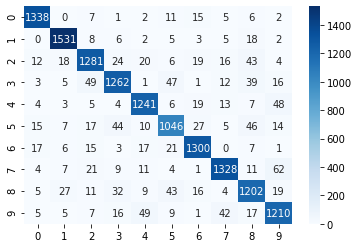

In [8]:
#step 2
sns.heatmap(confusion_matrix(test_labels,pred), annot=True, cmap='Blues', fmt='g')
print(accuracy_score(test_labels,pred))

In [9]:
#step 3
pca = PCA(n_components = 50)
pca_trans = pca.fit_transform(train_images)

In [10]:
start_time = time.time()

lg = LogisticRegression(max_iter=1000).fit(pca_trans, train_labels)
pca_test_x = pca.transform(test_images)
pred = lg.predict(pca_test_x)

print("--- %s seconds ---" % (time.time() - start_time))

--- 46.12792086601257 seconds ---


C:\Users\younk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9010714285714285


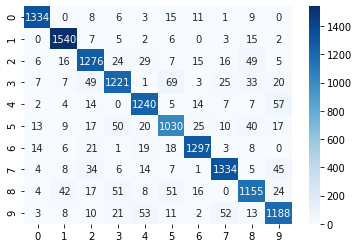

In [11]:
sns.heatmap(confusion_matrix(test_labels,pred), annot=True, cmap='Blues', fmt='g')
print(accuracy_score(test_labels,pred))

In [12]:
#step 4
scaler = StandardScaler()
scaler.fit(train_images)
s_train = scaler.transform(train_images)
s_test = scaler.transform(test_images)

pca = PCA(n_components = 50)
pca.fit(s_train)
pca_train = pca.transform(s_train)
pca_test = pca.transform(s_test)

In [13]:
start_time = time.time()

lg = LogisticRegression(max_iter=1000).fit(pca_train, train_labels)
pca_test_x = pca.transform(test_images)
pred = lg.predict(pca_test_x)

print("--- %s seconds ---" % (time.time() - start_time))

--- 20.416149377822876 seconds ---


0.8020714285714285


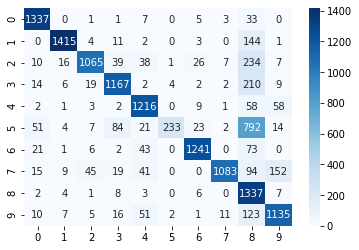

In [14]:
sns.heatmap(confusion_matrix(test_labels,pred), annot=True, cmap='Blues', fmt='g')
print(accuracy_score(test_labels,pred))

This problem compared the different accuracies and times for the prediction using logistic regression. The first version, which used no preprocessing, took the longest but also yielded the highest accuracy. The second used a pca model to downscale the dimensions of the data ini order to speed up computing time. This led to a major decrease in the time taken to calculate and had only a minimal impact on the accuracy. The last used the standard scaler and pca model to further reduce the computing time, but lead to a significant decrease in the accuracy. This is about what I expected because we are not removing any of the data when we use pca, but we are reducing the dimensions. This has the affect of reducing the running time and I believe the slight reduction accuracy is not due to the pca model.

## Problem 3 Gradient descent!

You have already built linear regression from scratch, but you are going to do it again!  This time you'll use the heuristic of gradient descent rather than the matrix closed form solution you had previously used.

Let's take a function you could have easily seen in calculus one

$(x+5)^2$ which of course is merely $x^2+10x+25$

Take the derivative with respect to x we arrive with: $2x+10$

Trying to find the minimum we set the derivative equal to 0, solve for X giving us -5.  

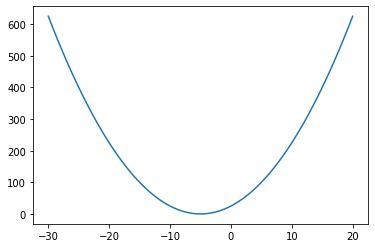

In [15]:
##Gradient descent example
x = np.linspace(-30,20,100)
y = (x+5)**2
plt.plot(x,y)

Stopping prematurely after: 571 iterations
Final estimated minimum value is: -4.999951128099857


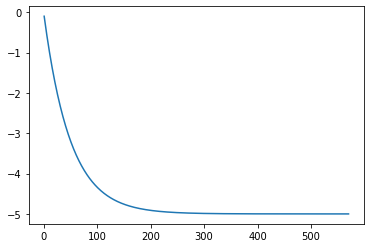

In [16]:
## Normally random start value, but we will leave it deterministic 
cur_val = 0
alpha = .01

## Choose a small precision and a high number of iterations
## If in a given step the delta between current/previous value is less than our precision we "converge"
precision = .000001
step = 1
iterations = 50000
count_iterations = 0

## Update is merely the derivative, which is 2x+10
def update(x):
    return 2*(x+5)

num_steps = []
val = []

while count_iterations < iterations:
    ##Update our value
    prev_val = cur_val
    cur_val = cur_val - alpha*update(prev_val)
    count_iterations+=1
    if abs(prev_val-cur_val) < precision:
        print("Stopping prematurely after:",count_iterations,"iterations")
        break
    
    num_steps.append(count_iterations)
    val.append(cur_val)

print("Final estimated minimum value is:",cur_val)
plt.plot(num_steps,val)

In [17]:
## Gradient Descent from scratch!
## Use the same dataset from the linear regression lab for this problem

df = pd.read_csv("salaraydata.csv")

xdata_ = df["YearsExperience"]
ydata_ = df["Salary"]


m = 0
b = 0
tol = .0000000000001
alpha = .001
epochs = 10000
costs = []

for i in range(1,epochs):
    ## y_pred = m and x multipled + b
    y_pred = m*xdata_+b
    
    ## loss_error = (y_i - y_i_pred)**2
    loss_error = (ydata_ - y_pred)**2

    ## cost function = sum of the loss error / number of samples (length)
    cost_func = sum(loss_error)/len(loss_error)

    ## append the previous line to the cost list
    costs.append(cost_func)
    
    #Calculate the derivative of slope and intercept
    #b, the intercept term
    db = (-2/len(xdata_)) * sum(ydata_ - y_pred)
    
    #m, the slope term
    dm = (-2/len(xdata_)) * sum(xdata_ * (ydata_ - y_pred))
    
    #Update our params
    # b = b - alpha*derivative of b
    b = b - alpha*db
    
    # m = m - alpha*derivative of m
    m = m - alpha*dm
    
    if len(costs) > 1 and abs(costs[-1]-costs[-2]) < tol:
        print("ending prematurely after:",i,"iterations")
        break
    
print("final b is:",b,"final m is:",m)

final b is: 25445.244500822344 final m is: 9501.449094458403


## Problem 4 K-means 

We are going to continue using the MNIST handwritten digits for this problem except we no longer desire a test train split so we will use the entire dataset.  As such I'm simply reimporting them for this problem so you don't need to worry about transformations from the previous problem affecting this problem.

Run kmeans on the mnist data, choose ten clusters as your number of clusters.  For each cluster:

1) Find the nearest 50 points to the cluster center, you can simply use euclidian distance via scipy's distance function.  I've provided a sample below (it will run faster than a list comprehension or for loop) 

2) Plot the cluster center as an image similar to the lab, and then average out the 50 closest images to the center and plot that resulting image.  Be incredibly careful averaging out these values, you want the ith pixel of each picture to be added together and divided by 50.  Plot this resulting "frankenpicture".  Based off of your cluster center and "frankenpicture" create a label for each of your clusters (write a comment cluster 0 represents x, cluster 1 represents y...etc).  Also find the most common occuring label within the 50 closest, if there is a tie mark the labels that make up the tie.


In [18]:
from scipy.spatial import distance
a = (1,2,3)
b = (4,5,6)
euclid_distance = distance.euclidean(a,b)
print(euclid_distance)

5.196152422706632


In [19]:
def plot_image(image,label=None):
    image_reshaped = np.array(image).reshape(28,-1)
                                   
    if label is not None:
        title = "This image is a: "+labels_dictionary[label]
        plt.title(title)
    #load image in grayscale
    plt.imshow(image_reshaped,cmap="gray") 
    plt.show()  # show the window

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist_pictures,mnist_labels = mnist.data, mnist.target

In [21]:
## Code here
k_means = KMeans(n_clusters=10, n_jobs=-1,random_state=42,precompute_distances=True).fit(mnist_pictures)

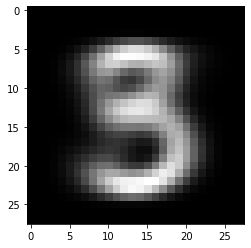

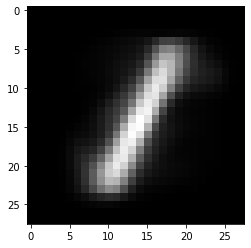

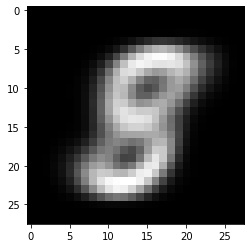

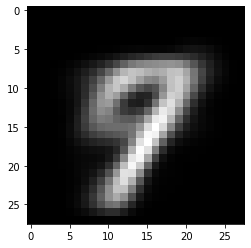

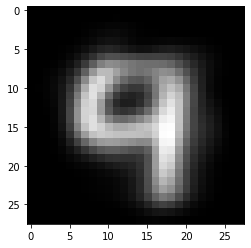

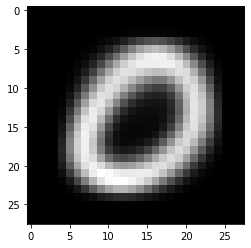

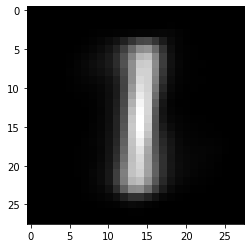

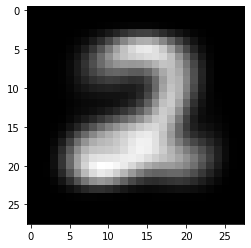

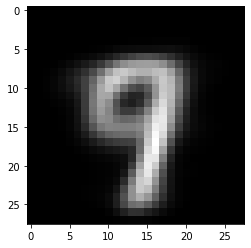

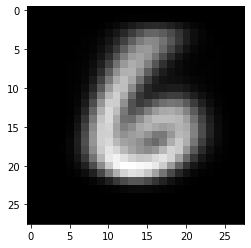

In [22]:
for cen in k_means.cluster_centers_:
    plot_image(cen)

0 : 


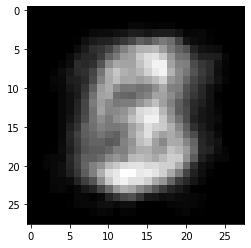

1 : 


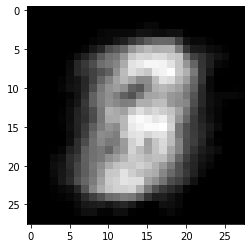

2 : 


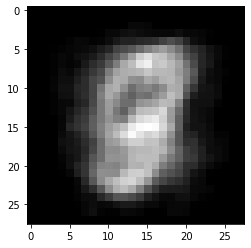

3 : 


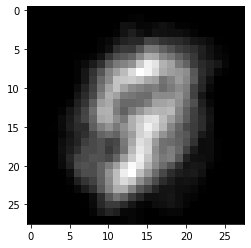

4 : 


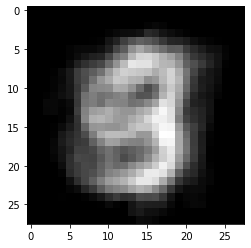

5 : 


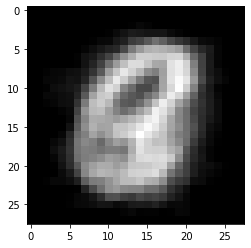

6 : 


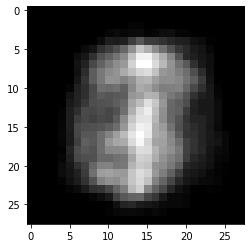

7 : 


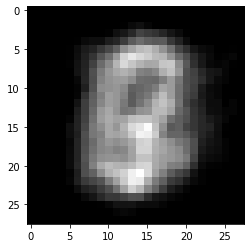

8 : 


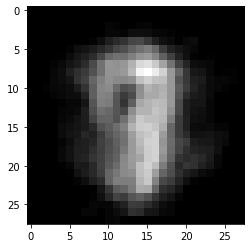

9 : 


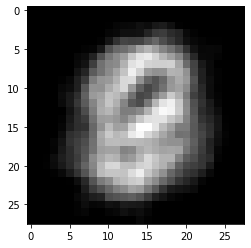

Most commonly found indicies: 
93


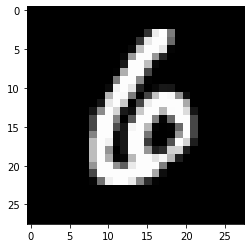

In [23]:
all_indices = list()
for num in range(10):    
    cen = k_means.cluster_centers_[num]

    #distances from cen to each image
    d_list = [distance.euclidean(n, cen) for n in mnist_pictures]
    
    closest_50 = list()

    for i in range(50):
        closest_50.append(d_list.index(min(d_list)))
        d_list.remove(min(d_list))

    all_indices = all_indices + closest_50    
        
    print(num,": ")

    temp = [0 for n in mnist_pictures[0]]

    for index in closest_50:
        temp += mnist_pictures[index]
    temp = [n/50 for n in temp]

    plot_image(temp)

print("Most commonly found indicies: ")
count_list = list()
for val in all_indices:
    count_list.append(all_indices.count(val))

t = list()
for c in count_list:
    t.append(count_list.count(c))
    
print(all_indices.index(max(all_indices)))
plot_image(mnist_pictures[all_indices.index(max(all_indices))])

Within the clusters, index...


    0 is a 3
    1 is a 1
    2 is an 8
    3 is a 9
    4 is a 9
    5 is a 0
    6 is a 1
    7 is a 2
    8 is a 9
    9 is a 6